In [1]:
from aestheval.data.datasets import AVA
import torch
from tqdm import tqdm
SPLITS = ('train', 'validation', 'test')

ava_dataset = [AVA(split, dataset_path="/media/data-storage/datasets/ava", load_images=False) for split in SPLITS]

/home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
dataset = torch.utils.data.ConcatDataset(ava_dataset)

In [3]:
dataset[0]

(None,
 {'im_id': '953417',
  'im_score': 6.11290322581,
  'query': 1396,
  'im_name': '953417.jpg',
  'comments': ["6.1! Nice! You have mad macro skills! You'll notice I don't have any... because I suck at it.",
   'Frog with attitude; love it.  Reminds me of Jabba of Star Wars, lol. (voted earlier)',
   'he does look kind of lonely. Funky colors.',
   "No thanks, he is quite blue is'nt he, I like this.",
   'great shot!',
   'Very cute!',
   'Funny shot. Very nice perspective and lovely colors.'],
  'sentiment': {'0': {'Negative': 0.3295336663722992,
    'Neutral': 0.2320113182067871,
    'Positive': 0.4384550452232361},
   '1': {'Negative': 0.005600472446531057,
    'Neutral': 0.03543514013290405,
    'Positive': 0.9589643478393555},
   '2': {'Negative': 0.5221530795097351,
    'Neutral': 0.4549880623817444,
    'Positive': 0.022858841344714165},
   '3': {'Negative': 0.03750083968043327,
    'Neutral': 0.2324349284172058,
    'Positive': 0.7300642728805542},
   '4': {'Negative': 0.0

In [5]:
ncomments=[]
nwords = []
for im, d in dataset:
    # print(d['comments'])
    ncomments.append(len(d['comments']))
    nwords.extend([len(x.split()) for x in d['comments']])

In [6]:
sum(ncomments)

3601761

In [7]:
len(dataset)

253961

In [8]:
import pandas as pd
pd.Series(ncomments).describe()

count    253961.000000
mean         14.182339
std          14.602677
min           1.000000
25%           6.000000
50%          10.000000
75%          17.000000
max         449.000000
dtype: float64

<AxesSubplot:>

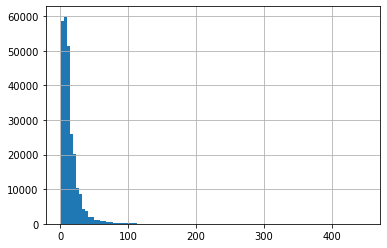

In [10]:
pd.Series(ncomments).hist(bins=100)

count    3.601761e+06
mean     1.462170e+01
std      1.688961e+01
min      0.000000e+00
25%      4.000000e+00
50%      1.000000e+01
75%      1.900000e+01
max      2.146000e+03
dtype: float64


<AxesSubplot:>

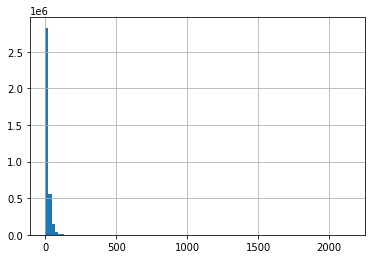

In [13]:
print(pd.Series(nwords).describe())
pd.Series(nwords).hist(bins=100)

In [9]:
gt_scores, pred_scores = zip(*[(data['im_score'], data['mean_score']) for _, data in tqdm(dataset)])



100%|██████████| 253961/253961 [00:00<00:00, 1253493.14it/s]


In [10]:
from scipy import stats
import sklearn.metrics as sm

pred_scores = [score*10 for score in pred_scores]
srcc = stats.spearmanr(gt_scores, pred_scores)
print("SRCC =", srcc)
mse = round(sm.mean_squared_error(gt_scores, pred_scores), 4)
print("MSE =", mse)
lcc = stats.pearsonr(gt_scores, pred_scores)
print("LCC =", lcc)

SRCC = SpearmanrResult(correlation=0.6739702330363183, pvalue=0.0)
MSE = 5.9397
LCC = (0.6424464694494703, 0.0)


In [11]:
df = pd.DataFrame({
    "Ground truth": gt_scores,
    "Predicted score": pred_scores
    })
df

,Ground truth,Predicted score
0,6.112903,7.937589
1,6.593750,8.828905
2,5.796875,9.539987
3,5.040984,9.905155
4,5.943548,9.696896
...,...,...
253956,4.439024,4.308670
253957,5.814050,7.860226
253958,5.344398,7.022425
253959,5.893701,9.159501


<AxesSubplot:ylabel='Frequency'>

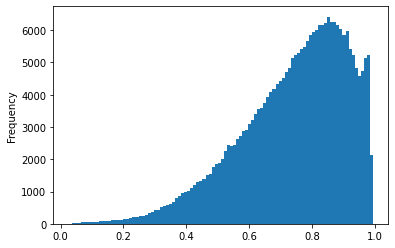

In [23]:
import pandas as pd
pd.Series([data['mean_score'] for _, data in dataset]).plot(kind='hist', bins=100)
